In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
from earm2_flat import model
from tropical.clusters_visualization import VisualizeClusters
from tropical.discretize_path import DomPath
from tropical.clustering import ClusterSequences
from tropical.sequence_analysis import Sequences
import numpy as np

In [3]:
vc = VisualizeClusters(model, 'earm_scipyode_sims.h5', clusters=None)

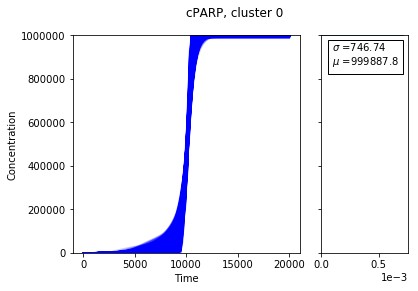

In [4]:
vc.plot_cluster_dynamics(species=['cPARP'], norm=False)

In [5]:
dp = DomPath(model=model, simulations='earm_scipyode_sims.h5', type_analysis='consumption', 
             dom_om=0.5, target='s37', depth=1)

In [6]:
signatures = dp.get_path_signatures(cpu_cores=100, verbose=True)

We're not done yet, 387 tasks to go!
We're not done yet, 254 tasks to go!
We're not done yet, 100 tasks to go!


In [7]:
signatures[0].to_csv('signatures_consumption_kpars_om05.csv')

In [8]:
seq = Sequences(signatures[0])
truncated_seqs = seq.truncate_sequences(49)

In [9]:
truncated_seqs.dissimilarity_matrix(n_jobs=100)

array([[ 0., 76., 98., ..., 96., 98., 76.],
       [76.,  0., 98., ..., 90., 90., 36.],
       [98., 98.,  0., ..., 96., 98., 98.],
       ...,
       [96., 90., 96., ...,  0., 74., 80.],
       [98., 90., 98., ..., 74.,  0., 56.],
       [76., 36., 98., ..., 80., 56.,  0.]])

In [10]:
cs = ClusterSequences(truncated_seqs)

In [11]:
cs.silhouette_score_spectral_range(cluster_range=20, n_jobs=100)

,num_clusters,cluster_silhouette
0,2,0.204583
1,3,0.266186
2,4,0.313221
3,5,0.368302
4,6,0.430911
5,7,0.447373
6,8,0.466530
7,9,0.413508
8,10,0.482042
9,11,0.424060


In [12]:
cs.silhouette_score_agglomerative_range(cluster_range=20, n_jobs=100)

,num_clusters,cluster_silhouette
0,2,0.125961
1,3,0.144377
2,4,0.142735
3,5,0.140848
4,6,0.235291
5,7,0.241033
6,8,0.238286
7,9,0.321680
8,10,0.321949
9,11,0.321675


In [15]:
cs.agglomerative_clustering(n_clusters=10)

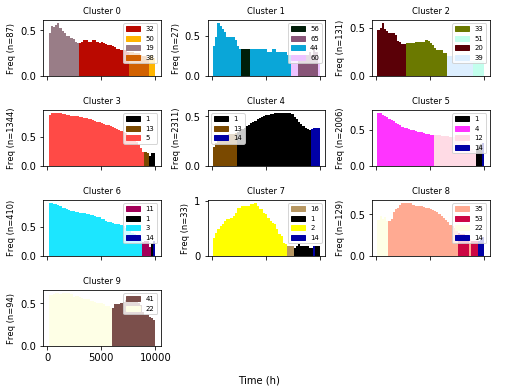

In [17]:
truncated_seqs.plot_sequences(type_fig='modal', cluster_labels=cs.labels, filename='modal_clusters_kpar')

In [44]:
print('cluster 0')
print(signatures[1][32])
print(np.where(cs.labels==0))
print('\n')
print('cluster 1')
print(signatures[1][44])
print(np.where(cs.labels==1))
print('\n')
print('cluster 2')
print(signatures[1][33])
print(np.where(cs.labels==2))
print('\n')
print('cluster 3')
print(signatures[1][5])
print(np.where(cs.labels==3))
print('\n')
print('cluster 4')
print(signatures[1][1])
print(np.where(cs.labels==4))
print('\n')
print('cluster 5')
print(signatures[1][12])
print(np.where(cs.labels==5))
print('\n')
print('cluster 6')
print(signatures[1][3])
print(np.where(cs.labels==6))
print('\n')
print('cluster 7')
print(signatures[1][2])
print(np.where(cs.labels==7))
print('\n')
print('cluster 8')
print(signatures[1][35])
print(np.where(cs.labels==8))
print('\n')
print('cluster 9')
print(signatures[1][41])
print(np.where(cs.labels==9))
print('\n')

cluster 0
{'order': 0, 'name': 's37', 'children': [{'order': 1, 'name': 's41'}, {'order': 1, 'name': 's43'}, {'order': 1, 'name': 's44'}]}
(array([ 187,  330,  336,  469,  559,  591,  618,  621,  648,  792, 1184,
       1187, 1242, 1272, 1320, 1373, 1758, 1797, 1840, 1849, 1861, 1888,
       1988, 2049, 2097, 2145, 2146, 2222, 2295, 2305, 2307, 2364, 2429,
       2518, 2673, 2815, 2862, 2909, 3021, 3060, 3070, 3204, 3237, 3302,
       3613, 3680, 3714, 3846, 3922, 3960, 3995, 4067, 4101, 4107, 4306,
       4438, 4536, 4542, 4569, 4847, 4848, 4857, 4904, 4976, 5002, 5071,
       5084, 5401, 5513, 5680, 5761, 5776, 5863, 5906, 5955, 6045, 6128,
       6141, 6152, 6185, 6285, 6362, 6390, 6391, 6404, 6456, 6513]),)


cluster 1
{'order': 0, 'name': 's37', 'children': [{'order': 1, 'name': 's43'}, {'order': 1, 'name': 's44'}, {'order': 1, 'name': 's45'}]}
(array([  30,   83,  212,  282,  502,  533, 1058, 1458, 1739, 1880, 1974,
       2043, 2522, 3257, 3258, 3312, 3513, 3700, 3924, 3993, 405

In [46]:
model.species[43]

Bcl2(bf=1, state='M') % Bid(bf=1, state='M')